In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

In [232]:
df = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [233]:
display(df)

Province/State          Country/Region        Lat  \
0                                  NaN             Afghanistan  33.000000   
1                                  NaN                 Albania  41.153300   
2                                  NaN                 Algeria  28.033900   
3                                  NaN                 Andorra  42.506300   
4                                  NaN                  Angola -11.202700   
5                                  NaN     Antigua and Barbuda  17.060800   
6                                  NaN               Argentina -38.416100   
7                                  NaN                 Armenia  40.069100   
8         Australian Capital Territory               Australia -35.473500   
9                      New South Wales               Australia -33.868800   
10                  Northern Territory               Australia -12.463400   
11                          Queensland               Australia -28.016700   
12                     South Australia               Australia -34.928500   
13                            Tasmania               Australia -41.454500   
14                            Victoria               Australia -37.813600   
15                   Western Australia               Australia -31.950500   
16                                 NaN                 Austria  47.516200   
17                                 NaN              Azerbaijan  40.143100   
18                                 NaN                 Bahamas  25.034300   
19                                 NaN                 Bahrain  26.027500   
20                                 NaN              Bangladesh  23.685000   
21                                 NaN                Barbados  13.193900   
22                                 NaN                 Belarus  53.709800   
23                                 NaN                 Belgium  50.833300   
24                                 NaN                   Benin   9.307700   
25                                 NaN                  Bhutan  27.514200   
26                                 NaN                 Bolivia -16.290200   
27                                 NaN  Bosnia and Herzegovina  43.915900   
28                                 NaN                  Brazil -14.235000   
29                                 NaN                  Brunei   4.535300   
..                                 ...                     ...        ...   
229                                NaN                  Zambia -15.416700   
230                                NaN                Zimbabwe -20.000000   
231                   Diamond Princess                  Canada   0.000000   
232                                NaN                Dominica  15.415000   
233                                NaN                 Grenada  12.116500   
234                                NaN              Mozambique -18.665695   
235                                NaN                   Syria  34.802075   
236                                NaN             Timor-Leste  -8.874217   
237                                NaN                  Belize  13.193900   
238                          Recovered                  Canada   0.000000   
239                                NaN                    Laos  19.856270   
240                                NaN                   Libya  26.335100   
241                                NaN      West Bank and Gaza  31.952200   
242                                NaN           Guinea-Bissau  11.803700   
243                                NaN                    Mali  17.570692   
244                                NaN   Saint Kitts and Nevis  17.357822   
245              Northwest Territories                  Canada  64.825500   
246                              Yukon                  Canada  64.282300   
247                                NaN                  Kosovo  42.602636   
248                                NaN                   Burma  21.916200   
249                 

In [234]:
dateCols = df.columns[4:]
#print(dateCols)

In [235]:
#merge by country
dfMerged = df.groupby("Country/Region")[dateCols].sum()
#display(dfMerged)

In [236]:
#leave only entries with 1000 or more cases
dfMergedOverThousand = dfMerged[dfMerged[dateCols[-1]] >= 1000]
display(dfMergedOverThousand)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                               
Algeria                     0        0        0        0        0        0   
Argentina                   0        0        0        0        0        0   
Australia                   0        0        0        0        4        5   
Austria                     0        0        0        0        0        0   
Belgium                     0        0        0        0        0        0   
Brazil                      0        0        0        0        0        0   
Canada                      0        0        0        0        1        1   
Chile                       0        0        0        0        0        0   
China                     548      643      920     1406     2075     2877   
Colombia                    0        0        0        0        0        0   
Croatia                     0        0        0        0        0        0   
Czechia                     0        0        0        0        0        0   
Denmark                     0        0        0        0        0        0   
Dominican Republic          0        0        0        0        0        0   
Ecuador                     0        0        0        0        0        0   
Egypt                       0        0        0        0        0        0   
Estonia                     0        0        0        0        0        0   
Finland                     0        0        0        0        0        0   
France                      0        0        2        3        3        3   
Germany                     0        0        0        0        0        1   
Greece                      0        0        0        0        0        0   
Iceland                     0        0        0        0        0        0   
India                       0        0        0        0        0        0   
Indonesia                   0        0        0        0        0        0   
Iran                        0        0        0        0        0        0   
Ireland                     0        0        0        0        0        0   
Israel                      0        0        0        0        0        0   
Italy                       0        0        0        0        0        0   
Japan                       2        2        2        2        4        4   
Korea, South                1        1        2        2        3        4   
Luxembourg                  0        0        0        0        0        0   
Malaysia                    0        0        0        3        4        4   
Mexico                      0        0        0        0        0        0   
Netherlands                 0        0        0        0        0        0   
Norway                      0        0        0        0        0        0   
Pakistan                    0        0        0        0        0        0   
Panama                      0        0        0        0        0        0   
Peru                        0        0        0        0        0        0   
Philippines                 0        0        0        0        0        0   
Poland                      0        0        0        0        0        0   
Portugal                    0        0        0        0        0        0   
Qatar                       0        0        0        0        0        0   
Romania                     0        0        0        0        0        0   
Russia                      0        0        0        0        0        0   
Saudi Arabia                0        0        0        0        0        0   
Serbia                      0        0        0        0        0        0   
Singapore                   0        1        3        3        4        5   
South Africa                0        0        0        0        0        0   
Spain                       0        0        0        0        0        0   
Sweden                      0        0      

In [237]:
#Start from 100
dfFrom100Rows = []
names = []

for index, row in dfMergedOverThousand.iterrows():
    newRow = []
    names.append(row.name)
    
    isOver100 = False
    for i in range(1, dfMergedOverThousand.shape[1]):
        if (row[i] >= 100):
            isOver100 = True
        if (isOver100):
            newRow.append(row[i])
            
    dfFrom100Rows.append(newRow)
 
      
#print(ratRows[4])   
#print(ratRows[5]) 
dfFrom100 = pd.DataFrame(dfFrom100Rows, index=names)
dfFrom100.head(40)

0    1     2     3     4     5     6     7     8      9   \
Algeria             139  201   230   264   302   367   409   454   511    584   
Argentina           128  158   266   301   387   387   502   589   690    745   
Australia           107  128   128   200   250   297   377   452   568    681   
Austria             104  131   182   246   302   504   655   860  1018   1332   
Belgium             109  169   200   239   267   314   314   559   689    886   
Brazil              151  151   162   200   321   372   621   793  1021   1546   
Canada              108  117   193   198   252   415   478   657   800    943   
Chile               155  201   238   238   434   537   632   746   922   1142   
China               643  920  1406  2075  2877  5509  6087  8141  9802  11891   
Colombia            102  128   196   231   277   378   470   491   539    608   
Croatia             105  128   206   254   315   382   442   495   586    657   
Czechia             141  189   253   298   396   464   694   833   995   1120   
Denmark             264  444   617   804   836   875   933  1025  1116   1225   
Dominican Republic  112  202   245   312   392   488   581   719   859    901   
Ecuador             111  199   367   506   789   981  1082  1173  1403   1595   
Egypt               109  110   150   196   196   256   285   294   327    366   
Estonia             115  171   205   225   258   267   283   306   326    352   
Finland             155  225   244   277   321   336   400   450   523    626   
France              100  130   191   204   288   380   656   959  1136   1219   
Germany             130  159   196   262   482   670   799  1040  1176   1457   
Greece              190  228   331   331   387   418   418   495   530    624   
Iceland             103  134   156   171   180   220   250   330   409    473   
India               102  113   119   142   156   194   244   330   396    499   
Indonesia           117  134   172   227   311   369   450   514   579    686   
Iran                139  245   388   593   978  1501  2336  2922  3513   4747   
Ireland             129  129   169   223   292   557   683   785   906   1125   
Israel              100  126   155   213   218   250   304   427   529    712   
Italy               155  229   322   453   655   888  1128  1694  2036   2502   
Japan               105  122   147   159   170   189   214   228   241    256   
Korea, South        104  204   433   602   833   977  1261  1766  2337   3150   
Luxembourg          140  203   335   484   670   798   875  1099  1333   1453   
Malaysia            117  129   149   149   197   238   428   566   673    790   
Mexico              118  164   203   251   316   367   405   475   585    717   
Netherlands         128  188   265   321   382   503   503   806   962   1138   
Norway              108  147   176   205   400   598   702   996  1090   1221   
Pakistan            136  236   299   454   501   730   776   875   972   1063   
Panama              109  137   200   313   345   345   443   558   674    786   
Peru                117  145   234   234   318   363   395   416   480    580   
Philippines         111  140   142   187   202   217   230   307   380    462   
Poland              103  119   177   238   251   355   425   536   634    749   

                    ...       63       64       65       66       67       68  \
Algeria             ...      NaN      NaN      NaN      NaN      NaN      NaN   
Argentina           ...      NaN      NaN      NaN      NaN      NaN      NaN   
Australia           ...      NaN      NaN      NaN      NaN      NaN      NaN   
Austria             ...      NaN      NaN      NaN      NaN      NaN      NaN   
Belgium             ...      NaN      NaN      NaN      NaN      NaN      NaN   
Brazil              ...      NaN      NaN      NaN      NaN      NaN      NaN   
Canada              ...      NaN      NaN      NaN      NaN      NaN      NaN   
Chile               ...      NaN      NaN      NaN 

In [238]:
#df.iloc[:,4:].head(10)
#dfIs = df.loc[df['Country/Region'] == "Italy"]
#print(dfIs)

In [239]:
def ratAvg(ratios):
    avg = 0
    tot = 0
    Ntot = 0
    for val in ratios[2:]:
        if (val > 0):
            tot += val
            Ntot += 1
    
    #print(tot)
    #print(Ntot)
    if (Ntot > 0):
        avg = tot / Ntot
    #print(avg)
    return(avg)
    
def ratAvgLast(ratios, n):
    newArr = []
    for rat in ratios:
        if (np.isnan(rat)):
            break
        newArr.append(rat)
        
    return ratAvg(newArr[:-n])

#ratAvg(dfRatio.loc[dfRatio['Country/Region'] == "Israel"].values[0])

In [240]:
daysToAvg = 5

ratAggRows = []
ratRows = []
names = []
#ratCols = df.columns[np.r_[0:2, 4:df.shape[1]]]
ratCols = dfFrom100.columns
#ratCols = np.append(ratCols, ["avg", "last", "max"])

for index, row in dfFrom100.iterrows():
    #if (not pd.isnull(row[0])):
    #    name = (row[1] + ', ' + row[0])
    #else:
    #    name = (row[1])
        
    names.append(row.name)
    #print(name)
    ratRow = []
    ratAggRow = []
    #ratRow.append(row[0])
    #ratRow.append(row[1])
    
    lastRat = 0
    maxRat = 0
    
    
    for i in range(daysToAvg,dfFrom100.shape[1]):
        if (i != 0):
            #if (row[i-1] > 0 and row[i] >= 0):
            #print(i)
            #print(row[i])
            ratio = math.pow(row[i] / row[i-daysToAvg], 1/daysToAvg)
            if (not np.isnan(ratio)):
                lastRat = ratio
            if (ratio > maxRat):
                maxRat = ratio
            #print(ratio)
            ratRow.append(ratio)
    #print(ratRow)    
    #dfRatio.loc[index] = ratRow
    #print(row.name)
    #print(ratRow)
    ratAggRow.append(ratAvg(ratRow))
    ratAggRow.append(ratAvg(ratRow[:daysToAvg]))
    ratAggRow.append(ratAvgLast(ratRow, daysToAvg))
    ratAggRow.append(lastRat)
    ratAggRow.append(maxRat)
    ratAggRows.append(ratAggRow)
    
    ratRows.append(ratRow)
    
    #dfRatio.append(pd.Series(ratRow, index=dfRatio.columns ), ignore_index=True)
      
#print(ratRows[4])   
#print(ratRows[5]) 
dfRatio = pd.DataFrame(ratRows, columns=ratCols[daysToAvg:], index=names)
#dfRatio.head(20)

dfRatioAgg = pd.DataFrame(ratAggRows, columns=['avg', 'startAvg', 'endAvg','last','max'], index=names)
dfRatioAgg.head(40)

avg  startAvg    endAvg      last       max
Algeria             1.155047  1.142626  1.142626  1.164579  1.214312
Argentina           1.141669  1.164251  1.163698  1.120910  1.260113
Australia           1.177875  1.247029  1.214788  1.049401  1.287021
Austria             1.184256  1.346092  1.222568  1.041405  1.379730
Belgium             1.194573  1.245060  1.216100  1.091460  1.316765
Brazil              1.230101  1.376266  1.263464  1.177383  1.389097
Canada              1.225214  1.300605  1.255581  1.118971  1.325099
Chile               1.183331  1.260425  1.217041  1.111839  1.311085
China               1.055042  1.371045  1.059469  1.000838  1.536641
Colombia            1.145969  1.185515  1.160005  1.119944  1.299506
Croatia             1.126105  1.177338  1.157622  1.073451  1.294717
Czechia             1.154073  1.257648  1.183694  1.083047  1.297118
Denmark             1.081993  1.084679  1.080123  1.091543  1.270811
Dominican Republic  1.169644  1.215296  1.215296  1.105543  1.342271
Ecuador             1.142713  1.213011  1.166890  1.120472  1.546213
Egypt               1.099302  1.128299  1.104861  1.102798  1.209736
Estonia             1.088159  1.074832  1.098421  1.077611  1.183485
Finland             1.106861  1.136228  1.125782  1.068387  1.167351
France              1.205000  1.375056  1.223439  1.149987  1.409774
Germany             1.211629  1.331372  1.239064  1.075157  1.396225
Greece              1.090897  1.094267  1.098278  1.066593  1.170805
Iceland             1.119494  1.188453  1.142911  1.054649  1.213159
India               1.190127  1.238591  1.192824  1.197609  1.261814
Indonesia           1.140569  1.207379  1.165723  1.081490  1.274153
Iran                1.136603  1.432135  1.148220  1.060813  1.609434
Ireland             1.179651  1.330942  1.217373  1.096096  1.395617
Israel              1.223442  1.230431  1.261545  1.108301  1.349652
Italy               1.164084  1.350622  1.183618  1.041426  1.417804
Japan               1.074184  1.087936  1.072862  1.109624  1.124746
Korea, South        1.074426  1.313683  1.084087  1.010044  1.565209
Luxembourg          1.126967  1.220089  1.167734  1.065412  1.416364
Malaysia            1.146930  1.326030  1.175537  1.058112  1.351966
Mexico              1.163943  1.182594  1.185319  1.111948  1.254749
Netherlands         1.173204  1.246206  1.196766  1.071969  1.314836
Norway              1.125918  1.353729  1.146351  1.045404  1.414325
Pakistan            1.124311  1.188790  1.138761  1.104165  1.399448
Panama              1.156221  1.190866  1.191700  1.110862  1.264552
Peru                1.137166  1.134734  1.133543  1.129443  1.254135
Philippines         1.189592  1.166342  1.185897  1.148847  1.241354
Poland              1.171173  1.236315  1.193021  1.120333  1.289937

In [241]:
#dfRatio.loc[dfRatio['Country/Region'] == "Italy"].values[0][3:-3]

In [242]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dfRatioAgg.sort_values(['endAvg'], ascending=False))

avg  startAvg    endAvg      last       max
Turkey                1.292560  1.376777  1.370753  1.171929  1.576888
US                    1.286215  1.349354  1.317878  1.138020  1.413053
Spain                 1.240333  1.414147  1.274526  1.074823  1.507060
Brazil                1.230101  1.376266  1.263464  1.177383  1.389097
Israel                1.223442  1.230431  1.261545  1.108301  1.349652
Canada                1.225214  1.300605  1.255581  1.118971  1.325099
Portugal              1.213536  1.310221  1.253349  1.104312  1.359554
South Africa          1.155824  1.310878  1.248356  1.036328  1.336863
Germany               1.211629  1.331372  1.239064  1.075157  1.396225
United Kingdom        1.215508  1.233616  1.233110  1.135994  1.336868
Russia                1.223811  1.211458  1.226113  1.208415  1.263433
France                1.205000  1.375056  1.223439  1.149987  1.409774
Austria               1.184256  1.346092  1.222568  1.041405  1.379730
Ireland               1.179651  1.330942  1.217373  1.096096  1.395617
Chile                 1.183331  1.260425  1.217041  1.111839  1.311085
Belgium               1.194573  1.245060  1.216100  1.091460  1.316765
Dominican Republic    1.169644  1.215296  1.215296  1.105543  1.342271
Australia             1.177875  1.247029  1.214788  1.049401  1.287021
Switzerland           1.176550  1.254931  1.206937  1.051895  1.349796
Romania               1.182169  1.180903  1.205839  1.113675  1.244385
Saudi Arabia          1.162223  1.261607  1.197702  1.084422  1.272753
Netherlands           1.173204  1.246206  1.196766  1.071969  1.314836
Poland                1.171173  1.236315  1.193021  1.120333  1.289937
India                 1.190127  1.238591  1.192824  1.197609  1.261814
Panama                1.156221  1.190866  1.191700  1.110862  1.264552
Thailand              1.151384  1.267523  1.189901  1.062848  1.277379
Philippines           1.189592  1.166342  1.185897  1.148847  1.241354
Mexico                1.163943  1.182594  1.185319  1.111948  1.254749
Czechia               1.154073  1.257648  1.183694  1.083047  1.297118
Italy                 1.164084  1.350622  1.183618  1.041426  1.417804
Serbia                1.169053  1.181953  1.179089  1.156494  1.240855
United Arab Emirates  1.173448  1.190816  1.178389  1.197565  1.214934
Malaysia              1.146930  1.326030  1.175537  1.058112  1.351966
Luxembourg            1.126967  1.220089  1.167734  1.065412  1.416364
Ecuador               1.142713  1.213011  1.166890  1.120472  1.546213
Indonesia             1.140569  1.207379  1.165723  1.081490  1.274153
Argentina             1.141669  1.164251  1.163698  1.120910  1.260113
Colombia              1.145969  1.185515  1.160005  1.119944  1.299506
Croatia               1.126105  1.177338  1.157622  1.073451  1.294717
Iran                  1.136603  1.432135  1.148220  1.060813  1.609434
Norway                1.125918  1.353729  1.146351  1.045404  1.414325
Iceland               1.119494  1.188453  1.142911  1.054649  1.213159
Algeria               1.155047  1.142626  1.142626  1.164579  1.214312
Pakistan              1.124311  1.188790  1.138761  1.104165  1.399448
Sweden                1.128432  1.288939  1.136392  1.098499  1.376987
Peru                  1.137166  1.134734  1.133543  1.129443  1.254135
Finland               1.106861  1.136228  1.125782  1.068387  1.167351
Egypt                 1.099302  1.128299  1.104861  1.102798  1.209736
Estonia               1.088159  1.074832  1.098421  1.077611  1.183485
Greece                1.090897  1.094267  1.098278  1.066593  1.170805
Korea, South          1.074426  1.313683  1.084087  1.010044  1.565209
Singapore             1.079595  1.059412  1.083607  1.062279  1.121955
Denmark               1.081993  1.084679  1.080123  1.091543  1.270811
Japan                 1.074184  1.087936  1.072862  1.109624  1.124746
China                 1.055042  1.371045  1.059469  1.000838  1.536641
Qatar                 1.053712  1.055994  1.035527 

In [243]:
#matplotlib.rcParams['figure.figsize'] = [1024,1024]

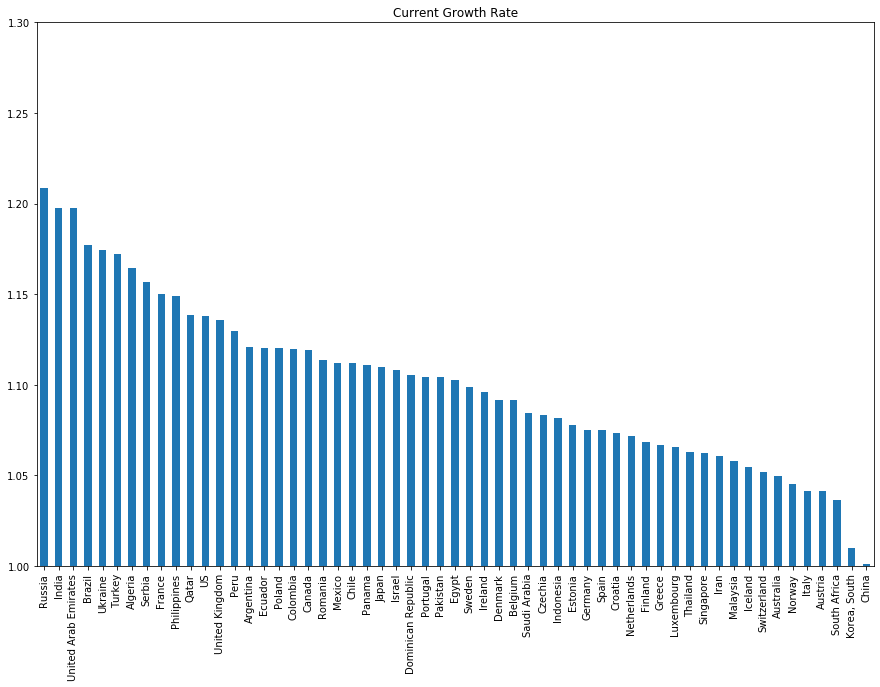

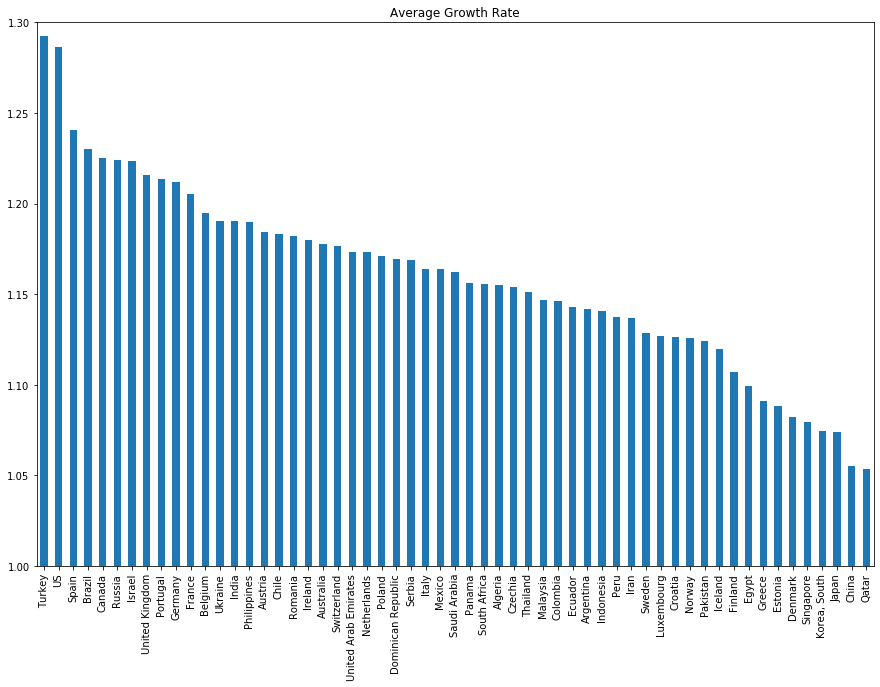

In [244]:
dfRatioAgg.sort_values(['last'], ascending=False).plot(kind='bar',y=['last'], ylim=(1,1.3), figsize=(15,10), legend=None, title="Current Growth Rate")
dfRatioAgg.sort_values(['avg'], ascending=False).plot(kind='bar',y=['avg'], ylim=(1,1.3), figsize=(15,10), legend=None, title="Average Growth Rate")

In [245]:
def remZeroes(lst):
    return([i for i in lst if (i != 0 and not np.isnan(i))])

In [246]:
#display(dfRatioAgg)
#print(dfRatioAgg.at["Israel", "last"])

Case Daily Growth Ratio


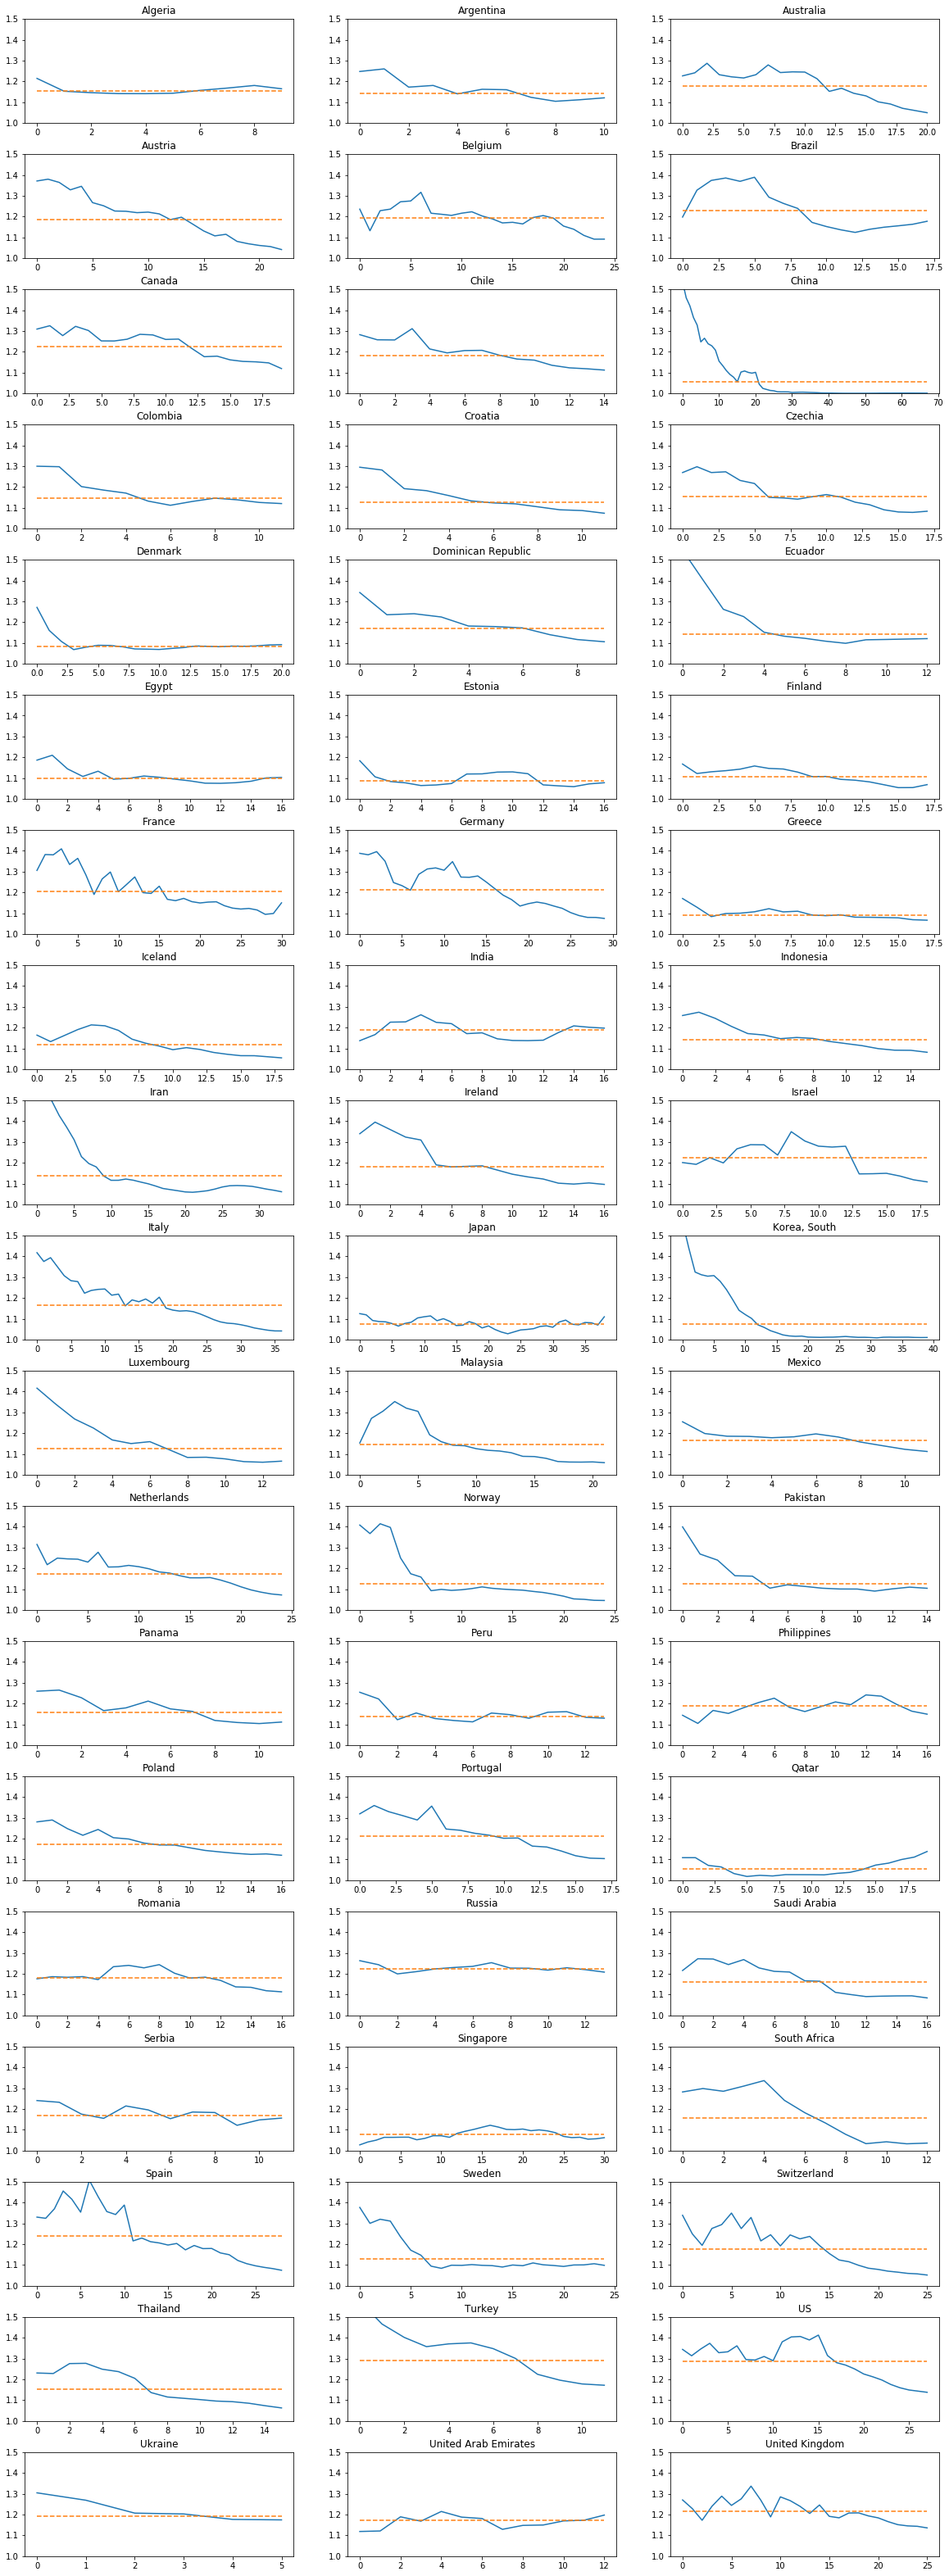

In [247]:
cols = 3
fig = plt.figure(figsize=(20,60))
#fig.suptitle('Case Daily Growth Ratio')
print('Case Daily Growth Ratio')
#fig.tight_layout()ZZ
fig.subplots_adjust(hspace=.3)


i = 1
for index, row in dfRatio.iterrows():
    vals = remZeroes(dfRatio.loc[index].values)
    if (len(vals) > 1):
        #print(dfRatio.loc[index].name)
        #print(dfRatio.loc[index].values[2:-3])
        plt.subplot(dfRatio.shape[0]/cols+1, cols, i)
        plt.plot(vals)
        plt.ylim(1,1.5)
        plt.gca().set_title(dfRatio.loc[index].name)
        
        avgs=np.empty(len(vals)); 
        avgs.fill(dfRatioAgg.at[dfRatio.loc[index].name, "avg"])
        
        plt.plot(avgs, linestyle='--')
        
        i+=1
        
plt.show()

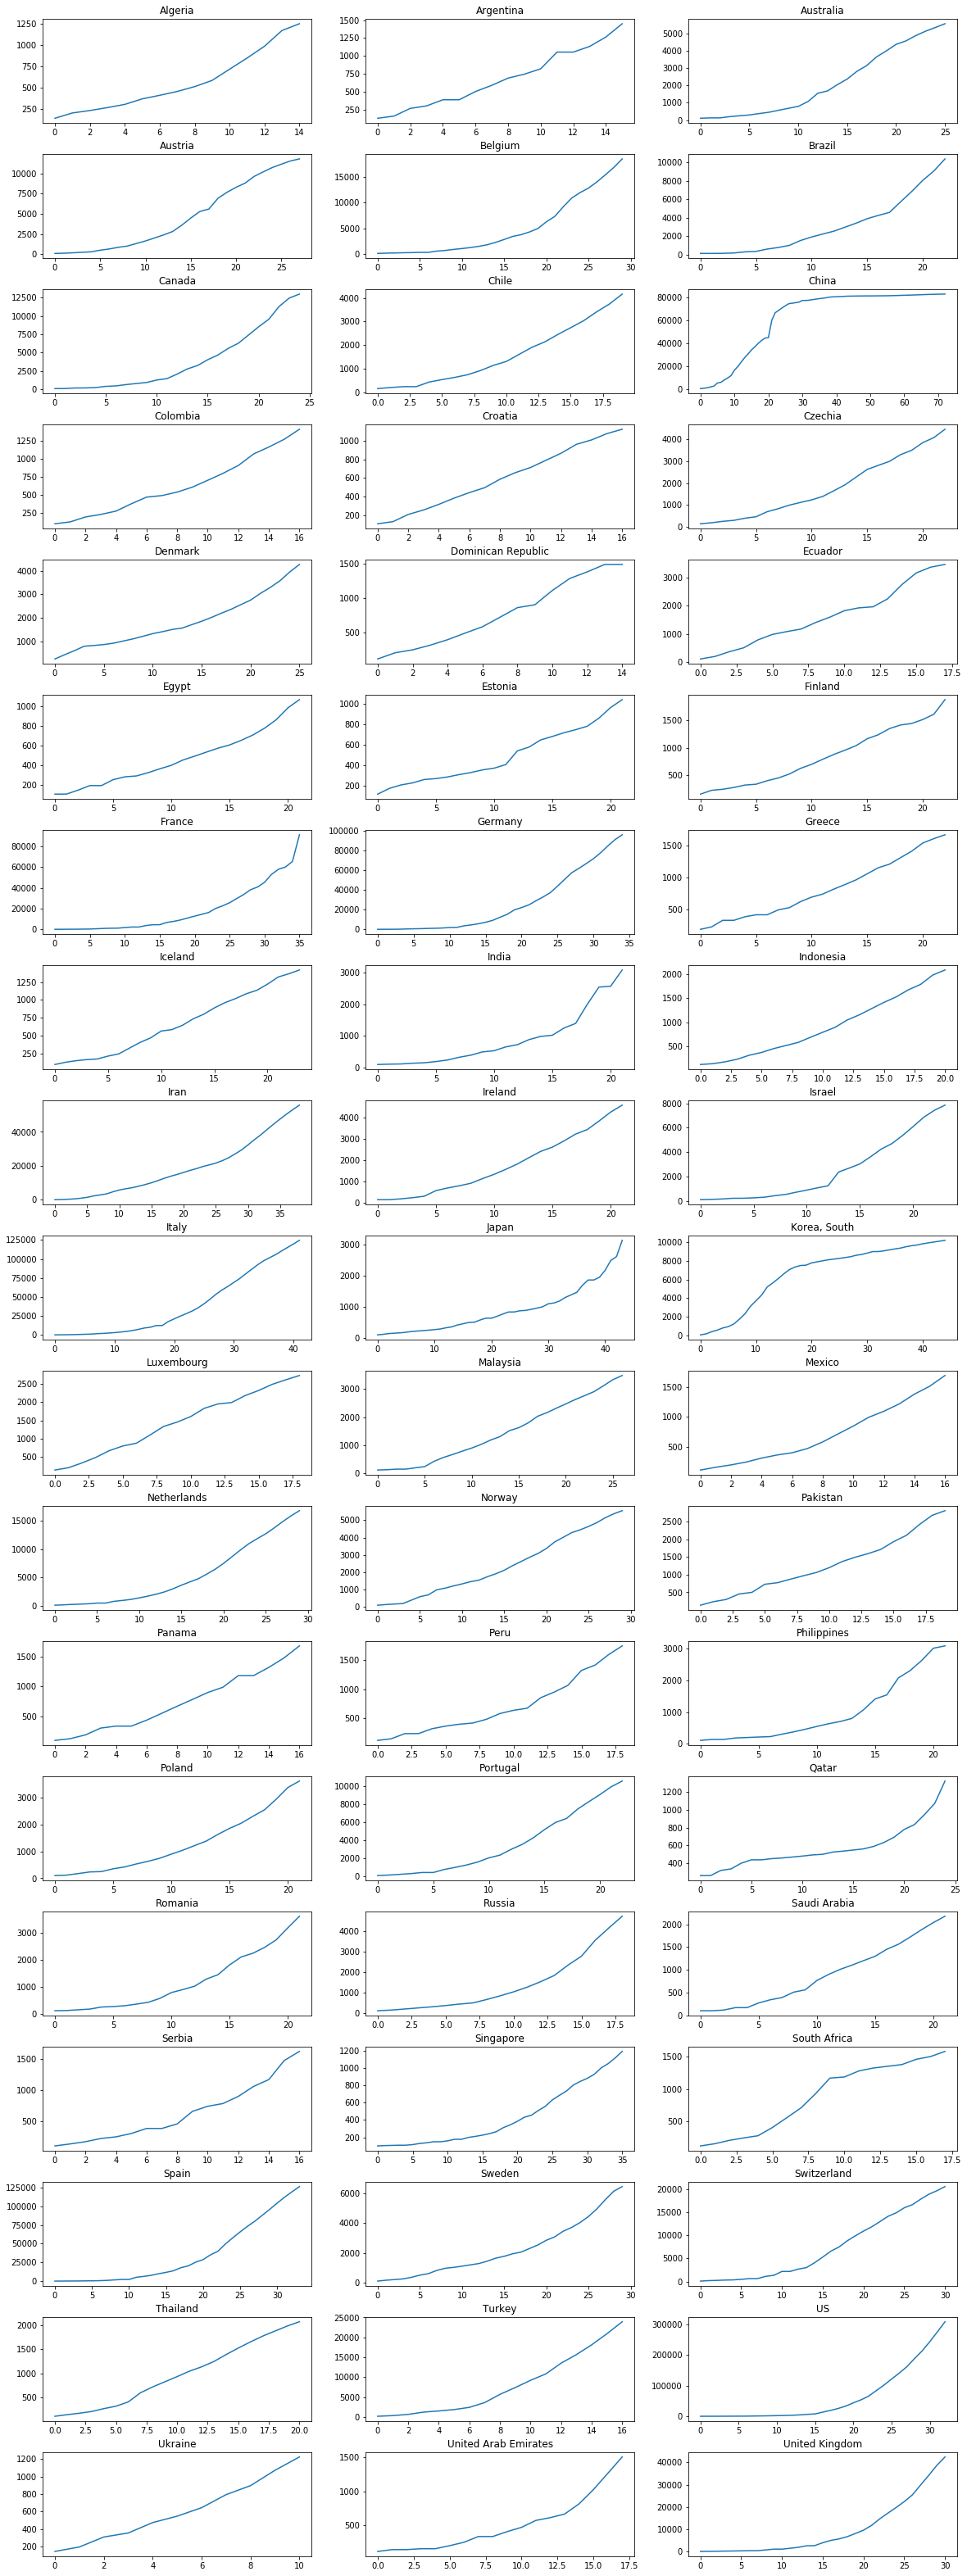

In [248]:
i=1
fig = plt.figure(figsize=(20,60))
fig.subplots_adjust(hspace=.3)

for index, row in dfFrom100.iterrows():
    plt.subplot(dfFrom100.shape[0]/cols+1, cols, i)
    plt.plot(remZeroes(dfFrom100.loc[index].values))
    #plt.suptitle()
    plt.gca().set_title(dfFrom100.loc[index].name)
    i+=1
    
plt.show()

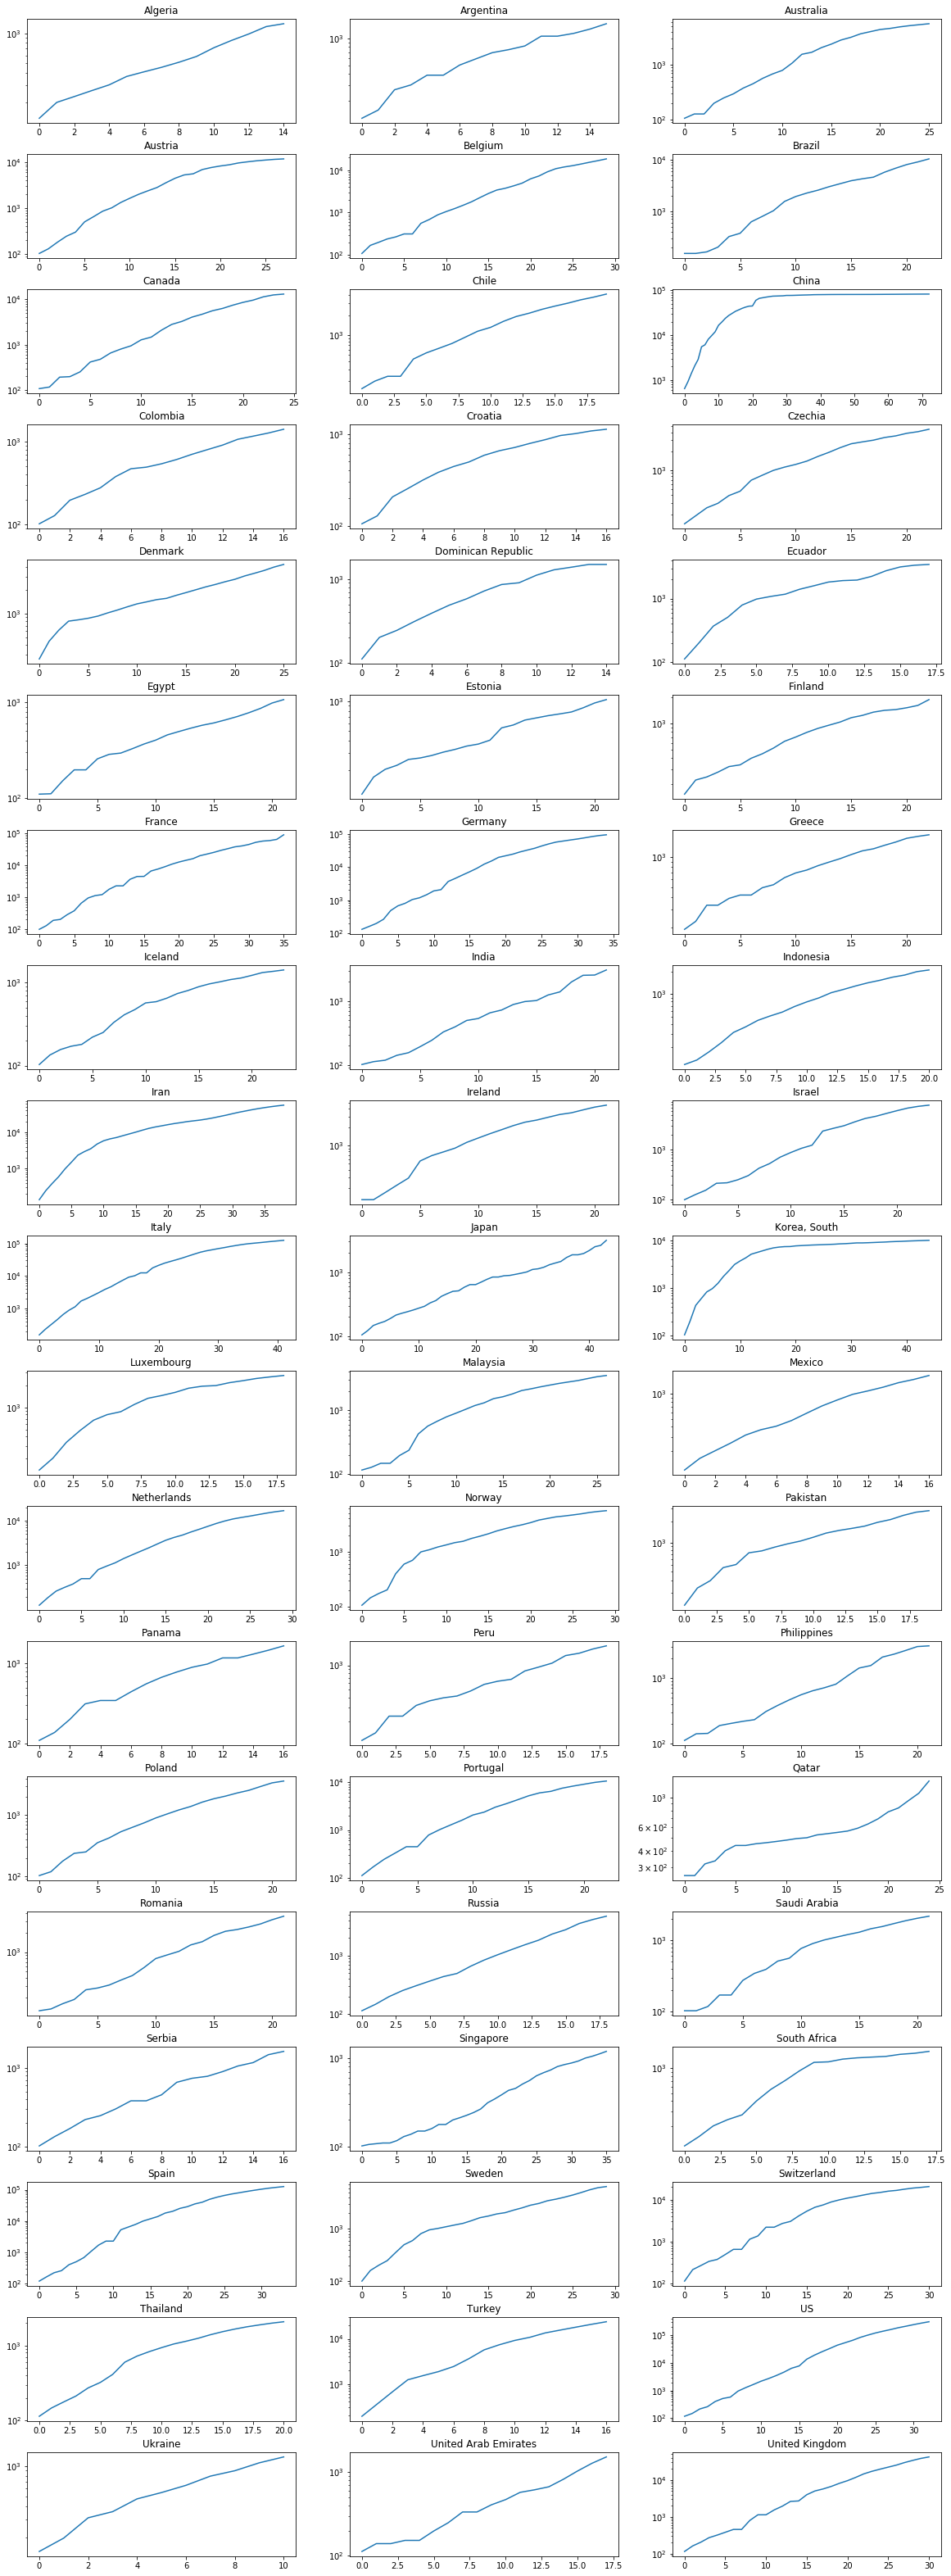

In [249]:
#df100Log = dfFrom100.applymap(np.log)
#for index, row in df100Log.iterrows():
#    #print(dfFrom100.loc[index].name)
#    plt.plot(remZeroes(df100Log.loc[index].values))
#    plt.suptitle(df100Log.loc[index].name)
#    plt.show()

i=1
fig = plt.figure(figsize=(20,60))
fig.subplots_adjust(hspace=.3)

for index, row in dfFrom100.iterrows():
    plt.subplot(dfFrom100.shape[0]/cols+1, cols, i)
    plt.plot(remZeroes(dfFrom100.loc[index].values))
    #plt.suptitle()
    plt.gca().set_title(dfFrom100.loc[index].name)
    plt.yscale('log')
    i+=1
    

    
plt.show()
